In [53]:
import sympy as sp
import numpy as np
from sympy import Eq, S, latex, plot_implicit, Matrix, symbols
from sympy import simplify, expand, collect, solve, solveset
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
import pandas as pd
from IPython.display import Latex, display
# from google.colab import files

In [3]:
from sympy.abc import x, y, z

# Практическое занятие 14
# Компьютерный практикум по алгебре на Python
### Задание 1.
Составить матрицу квадратичной формы $16x^2-21y^2+3z^2-4xy-4xz+10yz$, проверить, что она определяет именно заданный многочлен.

In [13]:
u = 16 * x ** 2 - 21 * y ** 2 + 3 * z ** 2 - 4 * x * y - 4 * x * z + 10 * y * z
A = Matrix([[16, -2, -2], [-2, -21, 5], [-2, 5, 3]])
X = Matrix([x, y, z])
check = X.T * A * X
check = simplify(expand(check[0]))
display(Latex(fr"$$A = {latex(A)}$$"))
display(Latex(fr"$$X^T AT = {latex(check)} \Rightarrow X^T AT - u = {latex(check - u)}$$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2.
Заданы векторы  $e_1=(1, 0, 1)$, $e_2=(-1, 0, 1)$, $e_1=(0, 1, 0)$.
Вывести (используя цикл!) на экран матрицу квадратичной формы Задания 1 в новом базисе из векторов


1.   ($e_1$, $e_2$, $e_3$),
2.   ($e_1$, $e_2 - e_1$, $e_3$),
3.   ($e_1$, $e_2$, $e_3 - e_1$),
4.   ($e_1$, $e_2 - e_1$, $e_3 - e_1$),
5.   ($e_1 + e_2$, $e_2$, $e_3 + e_2$),

при этом в файл "task2.xlsx" записать на листы $A_1$, $A_2$, ... матрицы в новом базисе, а на листы  $P_1$, $P_2$, ... соответствующие матрицы перехода.

In [32]:
e_1 = [1, 0, 1]
e_2 = [-1, 0, 1]
e_3 = [0, 1, 0]


def vecs_arifs(A, B, sign='+'):
    C = []
    if sign == '-':
        for i in range(len(A)):
            C.append(A[i] - B[i])
    elif sign == '+':
        for i in range(len(A)):
            C.append(A[i] + B[i])

    return C


P_list = [Matrix([e_1, e_2, e_3]).T,
          Matrix([e_1, vecs_arifs(e_2, e_1, '-'), e_3]).T,
          Matrix([e_1, e_2, vecs_arifs(e_3, e_1, '-')]).T,
          Matrix([e_1, vecs_arifs(e_2, e_1, '-'), vecs_arifs(e_3, e_1, '-')]).T,
          Matrix([vecs_arifs(e_2, e_1, '+'), e_2, vecs_arifs(e_3, e_2, '+')]).T]
A_new_list = [P.T * A * P for P in P_list]

with pd.ExcelWriter("/Users/almiravhadiev/Downloads/HSE/Math_Pracs/Algebra/Lab_14/task2.xlsx", mode='w') as f:
    for i in range(len(A_new_list)):
        A_pd = pd.DataFrame(A_new_list[i].tolist())
        A_pd.to_excel(f, sheet_name='A' + str(i + 1), header=None, index=None)


### Задание 3.
В цикле из файла "task3.xlsx" считать матрицы, вывести на экран каждую матрицу и ее собственные числа и собственные векторы.

In [45]:
with pd.ExcelFile("/Users/almiravhadiev/Downloads/HSE/Math_Pracs/Algebra/Lab_14/task3.xlsx") as f:
    for i in range(5):
        data_pd = pd.read_excel(f, sheet_name='A' + str(i + 1), index_col=False, header=None)
        data_np = data_pd.to_numpy()
        A = Matrix(data_np.tolist())
        display(Latex(fr"$A = {latex(A)}$"))
        display(Latex(fr"$\text{{Собственные числа и векторы: }}{latex(A.eigenvects())}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 4.
Привести квадратичную форму с матрицей
$$
\left[\begin{matrix}-645 & -12 & -960\\-12 & 3 & 9\\-960 & 9 & -1205\end{matrix}\right]
$$
к каноническому виду с помощью перехода к новому базису из собственных векторов.

Вывести на экран матрицу перехода к новому базису, матрицу квадратичной формы в новом базисе и квадратичную форму в старом и новом базисе (в виде многочлена от переменных $x$, $y$, $z$).

In [49]:
A = Matrix([[-645, -12, -960],
            [-12, 3, 9],
            [-960, 9, -1205]])
X = Matrix([x, y, z])

ev = A.eigenvects()
P = Matrix([Matrix([vect.normalized() for vect in vects]).T for num, multipl, vects in ev]).T
A_new = P.T * A * P

res = simplify(expand(X.T * A * X))[0]
res_new = simplify(expand(X.T * A_new * X))[0]

display(Latex(
    fr'$A_{{new}} = {latex(A_new)},\ P = {latex(P)},\\\\ res = {latex(res)},\\\\ res_{{new}} = {latex(res_new)}$'))

<IPython.core.display.Latex object>

### Задание 5*.
Определить тип кривой второго порядка, заданной уравнением
$$
97x^2 - 144xy + 97y^2 + 482x - 532y = 3452
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика.

Exception ignored in: <function ZipFile.__del__ at 0x10a030860>
Traceback (most recent call last):
  File "/Users/almiravhadiev/.conda/envs/CompPracs/lib/python3.11/zipfile.py", line 1874, in __del__
    self.close()
  File "/Users/almiravhadiev/.conda/envs/CompPracs/lib/python3.11/zipfile.py", line 1891, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file
Exception ignored in: <function ZipFile.__del__ at 0x10a030860>
Traceback (most recent call last):
  File "/Users/almiravhadiev/.conda/envs/CompPracs/lib/python3.11/zipfile.py", line 1874, in __del__
    self.close()
  File "/Users/almiravhadiev/.conda/envs/CompPracs/lib/python3.11/zipfile.py", line 1891, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file
Exception ignored in: <function ZipFile.__del__ at 0x10a030860>
Traceback (most recent call last):
  File "/Users/almiravhadiev/.conda/envs/CompPracs/lib/python3.11/zipfile.py", line 1874, in __del__
    self.close()
  File "/Users/almira

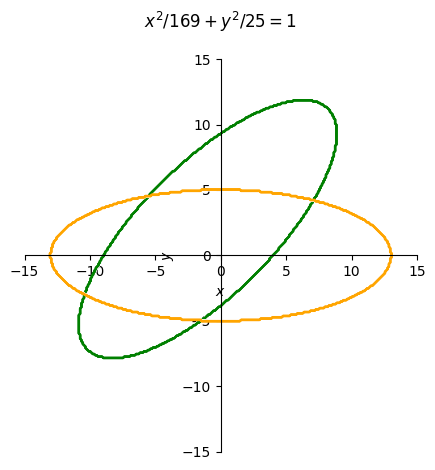

In [56]:
A3 = Matrix([[97, -72, 241],
             [-72, 97, -266],
             [241, -266, -3452]])
X3 = Matrix([x, y, 1])
eq3 = Eq(simplify(expand(X3.T * A3 * X3))[0], 0)

alpha = sp.acot((A3[0, 0] - A3[1, 1]) / (2 * A3[0, 1])) / 2
P = Matrix([[Cos(alpha), -Sin(alpha), 0],
            [Sin(alpha), Cos(alpha), 0],
            [0, 0, 1]])
P.simplify()
A3_new = P.T * A3 * P
A3_new.simplify()

from sympy.abc import X, Y, Z

X3 = Matrix((X, Y, 1))

X3_new = Matrix((X - A3_new[0, 2] / A3_new[0, 0],
                 Y - A3_new[1, 2] / A3_new[1, 1],
                 1))
eq3_new = simplify(expand(X3_new.T * A3_new * X3_new))[0]

free = eq3_new.subs({X: 0, Y: 0})
eq3_last = eq3_new / (-free) + 1
eq3_last_xy = Eq(eq3_last.subs({X: x, Y: y}), 1)

p = plot_implicit(eq3, (x, -15, 15), (y, -15, 15), line_color='g', aspect_ratio=(1, 1),
                  xlabel='$x$', ylabel='$y$',
                  title=f'{latex(eq3_last_xy, mode="inline")}\n',
                  adaptive=False, show=False)
p.extend(plot_implicit(eq3_last_xy, (x, -15, 15), (y, -15, 15), line_color='orange',
                       aspect_ratio=(1, 1), adaptive=False, show=False))
p.show()

### Задание 6*.
Определить тип кривой второго порядка, заданной уравнением
$$
x^2+2xy+y^2-4x+4y=4
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика.

Указание: каноническое уравнение параболы $y^2 = 2px$ или $x^2 = 2py$; для того, чтобы выразить $x$ или $y$ можно воспользоваться solve или solveset.

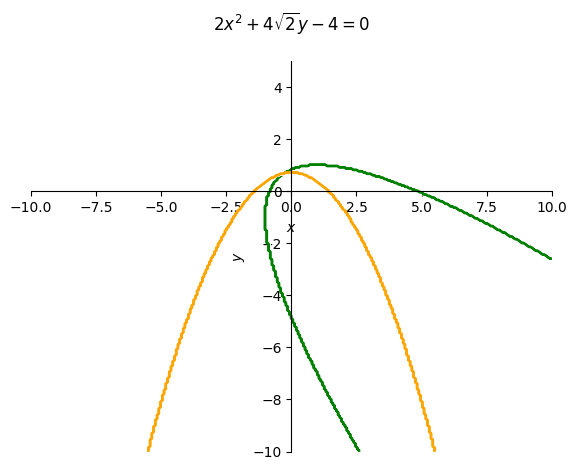

In [57]:
A3 = Matrix([[1, 1, -2], [1, 1, 2], [-2, 2, -4]])
X3 = Matrix([x, y, 1])
eq3 = Eq(simplify(expand(X3.T * A3 * X3))[0], 0)

alpha = sp.acot((A3[0, 0] - A3[1, 1]) / (2 * A3[0, 1])) / 2
P = Matrix([[Cos(alpha), -Sin(alpha), 0],
            [Sin(alpha), Cos(alpha), 0],
            [0, 0, 1]])
P.simplify()
A3_new = P.T * A3 * P
A3_new.simplify()

from sympy.abc import X, Y, Z

X3 = Matrix((X, Y, 1))

eq3_new = Eq(simplify(expand((X3.T * A3_new * X3)[0])), 0)
eq3_new = eq3_new.subs({X: x, Y: y})

p = plot_implicit(eq3, (x, -10, 10), (y, -10, 5), line_color='g', aspect_ratio=(1, 1),
                  xlabel='$x$', ylabel='$y$',
                  title=f'{latex(eq3_new, mode="inline")}\n',
                  adaptive=False, show=False)
p.extend(plot_implicit(eq3_new, (x, -10, 10), (y, -10, 5), line_color='orange',
                       aspect_ratio=(1, 1), adaptive=False, show=False))
p.show()

###  Индивидуальное задание
Составить матрицу квадратичной формы и привести ее к каноническому виду с помощью перехода к новому базису из собственных векторов. Векторы выводить на экран не нужно. Вывести на экран матрицу в исходном виде и канонической форме, а также саму квадратичную форму в каноническом виде.

Вариант N 175

$$Q = - 943 x^{2} + 150 \sqrt{3} x y - 228 \sqrt{6} x z - 325 y^{2} - 900 \sqrt{2} y z + 368 z^{2}$$

In [62]:
A = Matrix([[             -943,   75 * sp.sqrt(3), -114 * sp.sqrt(6)],
            [  75 * sp.sqrt(3),              -325, -450 * sp.sqrt(2)],
            [-114 * sp.sqrt(6), -450 * sp.sqrt(2),               368]])

X = Matrix([x, y, z])

display(expand(X.T * A * X))

ev = A.eigenvects()
P = Matrix([Matrix([vect.normalized() for vect in vects]).T for num, multipl, vects in ev]).T
A_new = P.T * A * P

res = simplify(expand(X.T * A * X))[0]
res_new = simplify(expand(X.T * A_new * X))[0]

display(Latex(fr'$A = {latex(A)},\ A_{{new}} = {latex(A_new)},\\\\\
 res_{{new}} = {latex(res_new)}$'))

Matrix([[-943*x**2 + 150*sqrt(3)*x*y - 228*sqrt(6)*x*z - 325*y**2 - 900*sqrt(2)*y*z + 368*z**2]])

<IPython.core.display.Latex object>